به نام خدا

پروژه‌ی یادگیری ماشین

علیرضا توکلی ۸۱۰۱۹۷۶۸۶

# هدف از انجام
هدف از انجام این پروژه بررسی الگوریتم‌های یادگیری ماشین و پیش‌پردازش داده‌ها می‌باشد.

# توضیح کلی پروژه
در این پروژه ما با داده‌هایی از فروش خانه‌هایی مواجهیم که می‌بایست با توجه به ویژگی‌های داده شده، خانه‌های دیگری را قیمت گزاری کنیم. ابتدا باید داده‌ها را به خوبی بشناسیم. برای این مرحله از نمودارهای مختلف استفاده می‌کنیم. پس از آن داده‌ها را پیش‌پردازش کنیم؛ یعنی داده‌های ناقص را درست کنیم و در آخر نیز الگوریتم‌های یادگیری را اعمال می‌کنیم.

# داده‌های مورد استفاده
داده‌های مورد استفاده در این پروژه از سایت kaggle آمده‌اند که هدف از آن‌ها یادگیری است. 

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Phase 0

## 1

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

با بررسی دو سلول بالا می‌توان شهود کلی‌ای از دیتای مورد نظر پیدا کرد. تعداد ستون‌ها و سطرها، نوع هر ستون، مقدار حافظه و تعداد مقادیر غیر خالی هر ستون مشخص شده است.

In [35]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

شهود کلی‌ای از دیتای مورد نظر به ما می‌دهد. مثلا برای id ما انتظار داشتیم که از ۱ تا ۱۴۶۰ باشد که یعنی تمامی سطرها آیدی مربوط به خودشان را داشته باشند. یا مثلا از MSSubClass انتظار داشتیم طبق data_description مقادیر گسسته‌ی گفته شده را بگیرد که می‌بینیم مینیمم 20 است و نیمی از داده‌ها ۵۰ یا کم‌تر از آن هستند. 

## 2

In [36]:
def nanPercent(data, column):
    return data[column].isna().sum() / len(data[column]) * 100

In [37]:
columns = train.columns
for col in columns:
    print("Non-null", col, "=", nanPercent(train, col), "%")

Non-null Id = 0.0 %
Non-null MSSubClass = 0.0 %
Non-null MSZoning = 0.0 %
Non-null LotFrontage = 17.73972602739726 %
Non-null LotArea = 0.0 %
Non-null Street = 0.0 %
Non-null Alley = 93.76712328767123 %
Non-null LotShape = 0.0 %
Non-null LandContour = 0.0 %
Non-null Utilities = 0.0 %
Non-null LotConfig = 0.0 %
Non-null LandSlope = 0.0 %
Non-null Neighborhood = 0.0 %
Non-null Condition1 = 0.0 %
Non-null Condition2 = 0.0 %
Non-null BldgType = 0.0 %
Non-null HouseStyle = 0.0 %
Non-null OverallQual = 0.0 %
Non-null OverallCond = 0.0 %
Non-null YearBuilt = 0.0 %
Non-null YearRemodAdd = 0.0 %
Non-null RoofStyle = 0.0 %
Non-null RoofMatl = 0.0 %
Non-null Exterior1st = 0.0 %
Non-null Exterior2nd = 0.0 %
Non-null MasVnrType = 0.547945205479452 %
Non-null MasVnrArea = 0.547945205479452 %
Non-null ExterQual = 0.0 %
Non-null ExterCond = 0.0 %
Non-null Foundation = 0.0 %
Non-null BsmtQual = 2.5342465753424657 %
Non-null BsmtCond = 2.5342465753424657 %
Non-null BsmtExposure = 2.6027397260273974 %
No

## 3

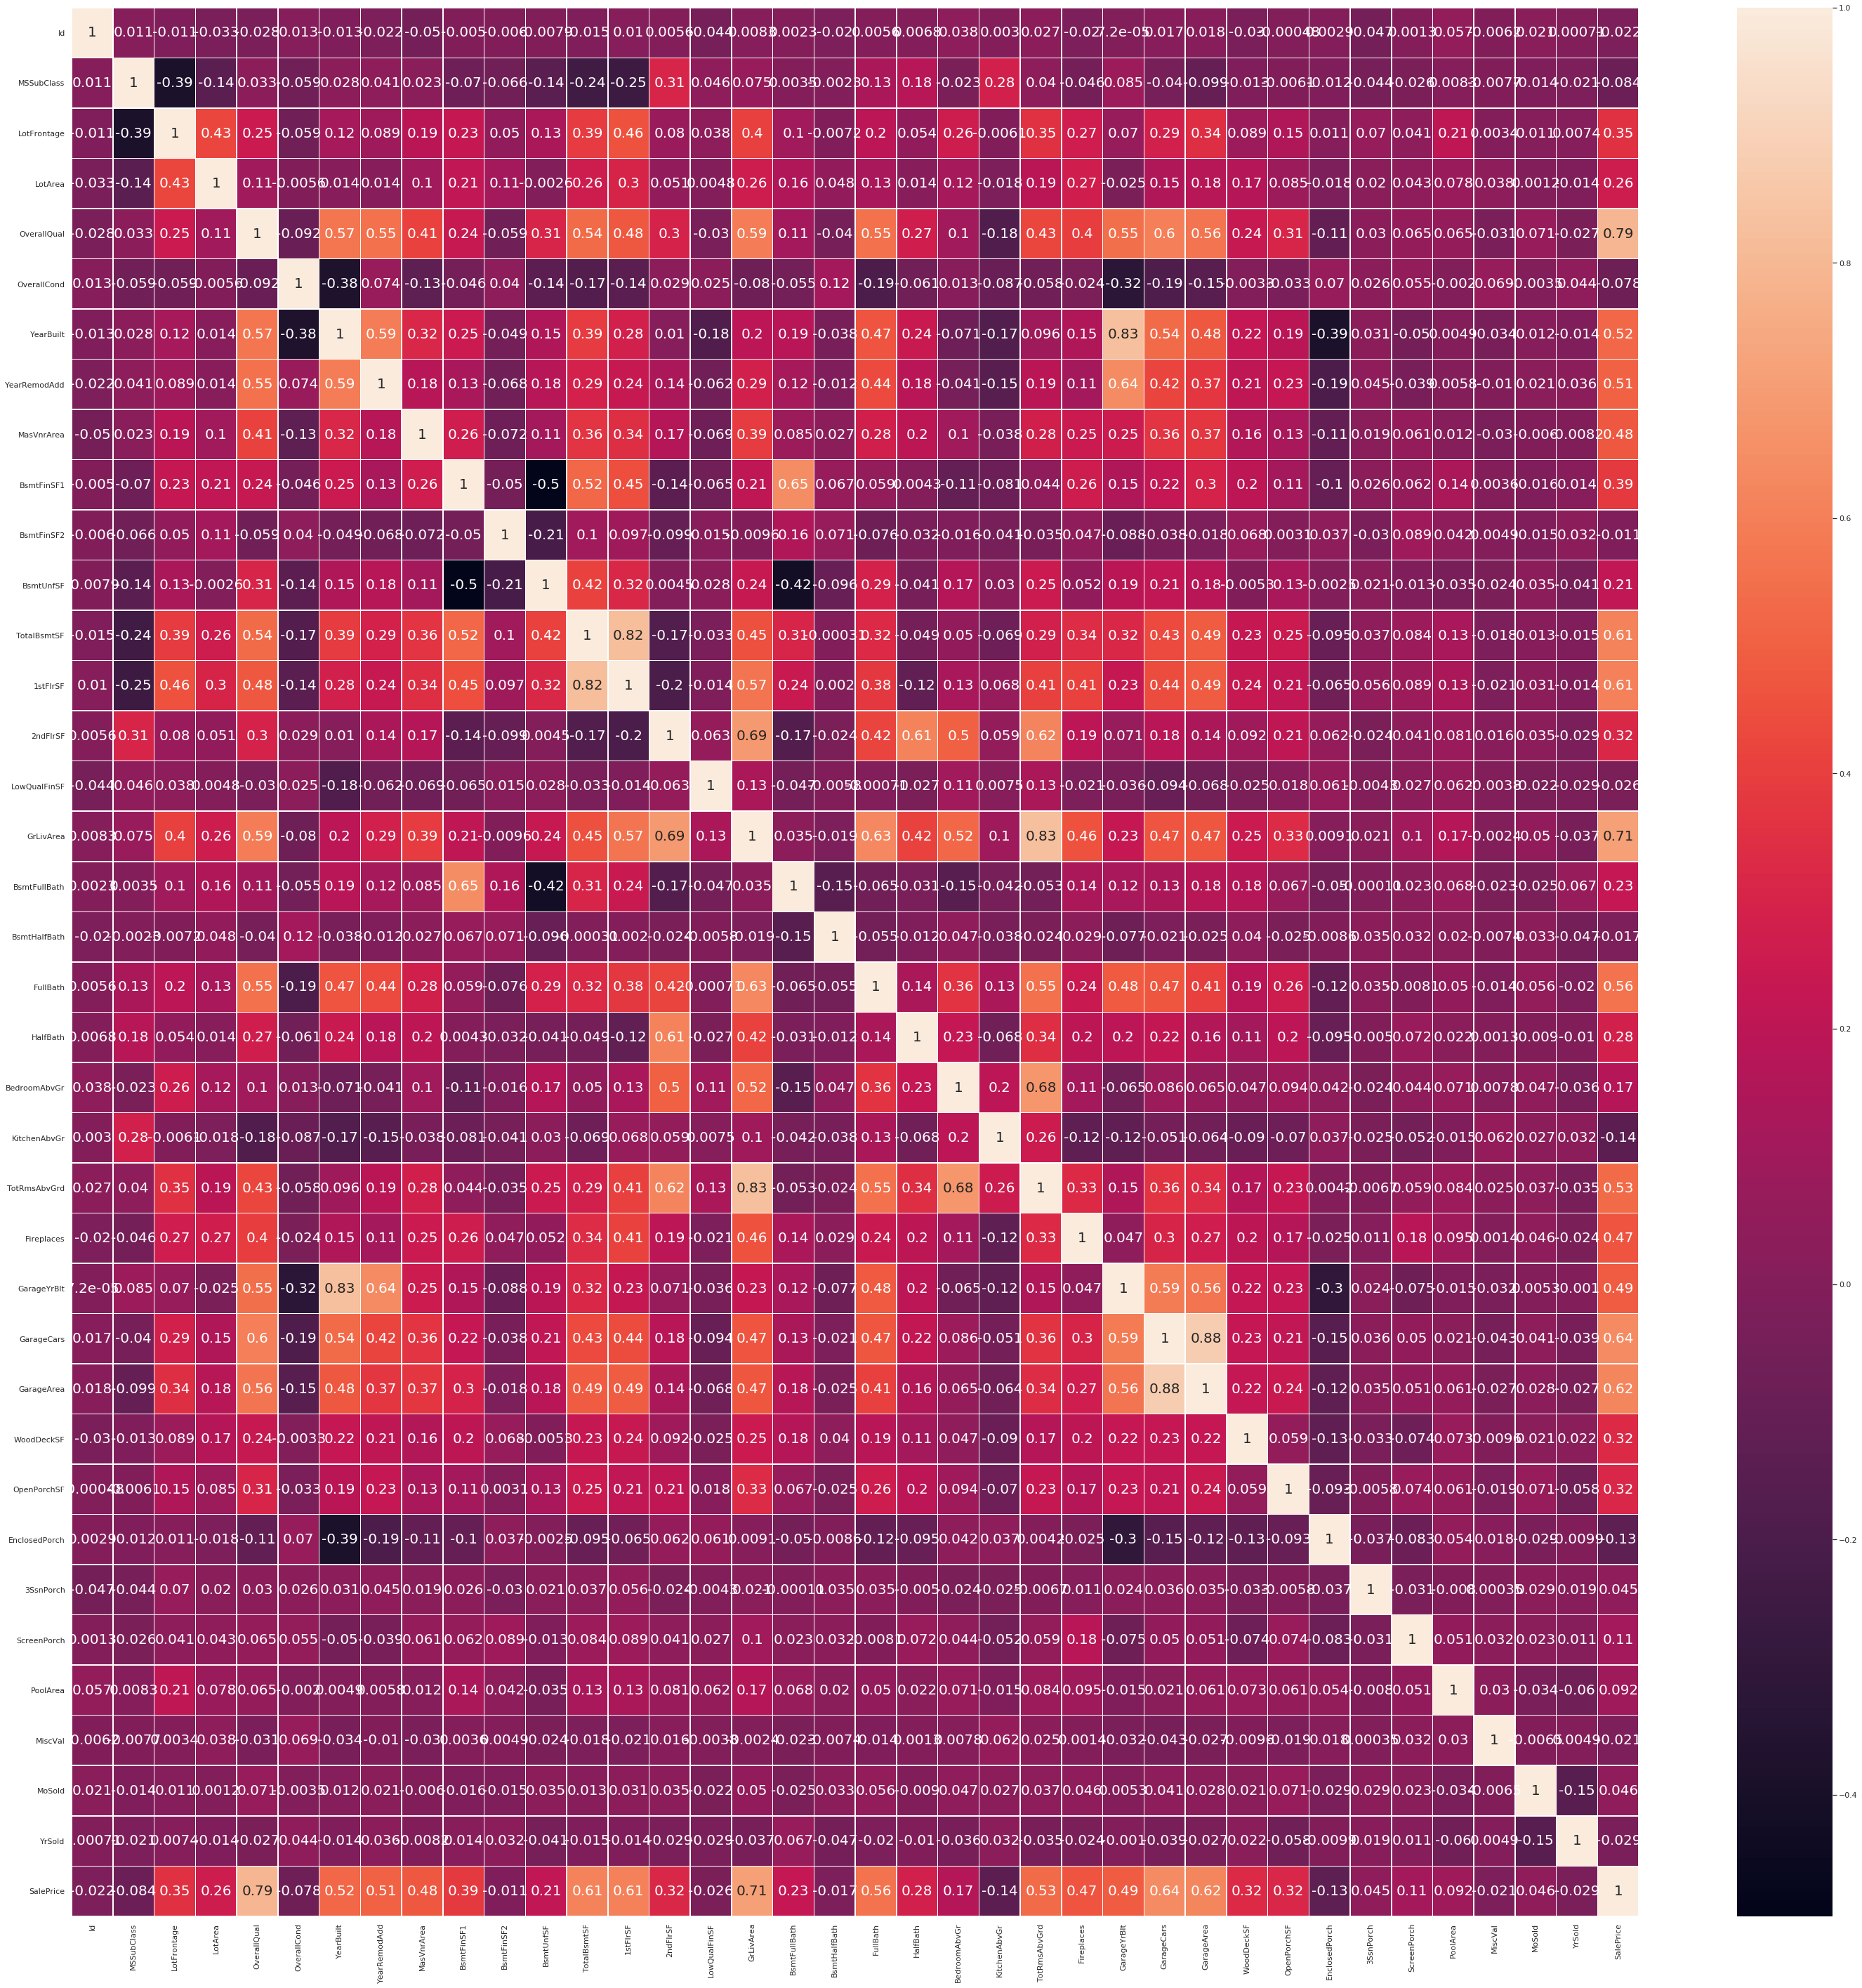

In [38]:
plt.rcParams['font.size'] = 50 # use http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
fig, ax = plt.subplots(figsize = (50, 50))
sns.heatmap(train.corr(), annot=True, annot_kws={"size": 20}, linewidths=.5, ax=ax) # Use from https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

In [39]:
relatedFeatures = 4
top4 = train.corr().SalePrice.sort_values(ascending = False)[1:relatedFeatures + 1]
print(top4)
top4Names = top4.index

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


چهار ویژگی گفته شده در بالا، بیش‌ترین کورلیشن را با مقدار هدف ما داشتند و به ترتیب نمایان‌گر کیفیت منابع استفاده شده در ساختن خانه، مساحت طبقات بالایی، تعداد ماشین‌هایی که می‌توان در گاراژ گذاشت و مساحت گاراژ مورد نظر هستند. این نشان می‌دهد که بر خلاف شرایط فعلی ما در ایران، شاید مساحت خونه برای آن‌ها خیلی تاثیر جدی‌ای ندارد و تاثیر تعداد ماشین‌ها در گاراژ مهم‌تر است. 

## 4

In [40]:
import math
logTrain = train.copy()
logTrain['SalePrice'] = np.log(logTrain['SalePrice'])

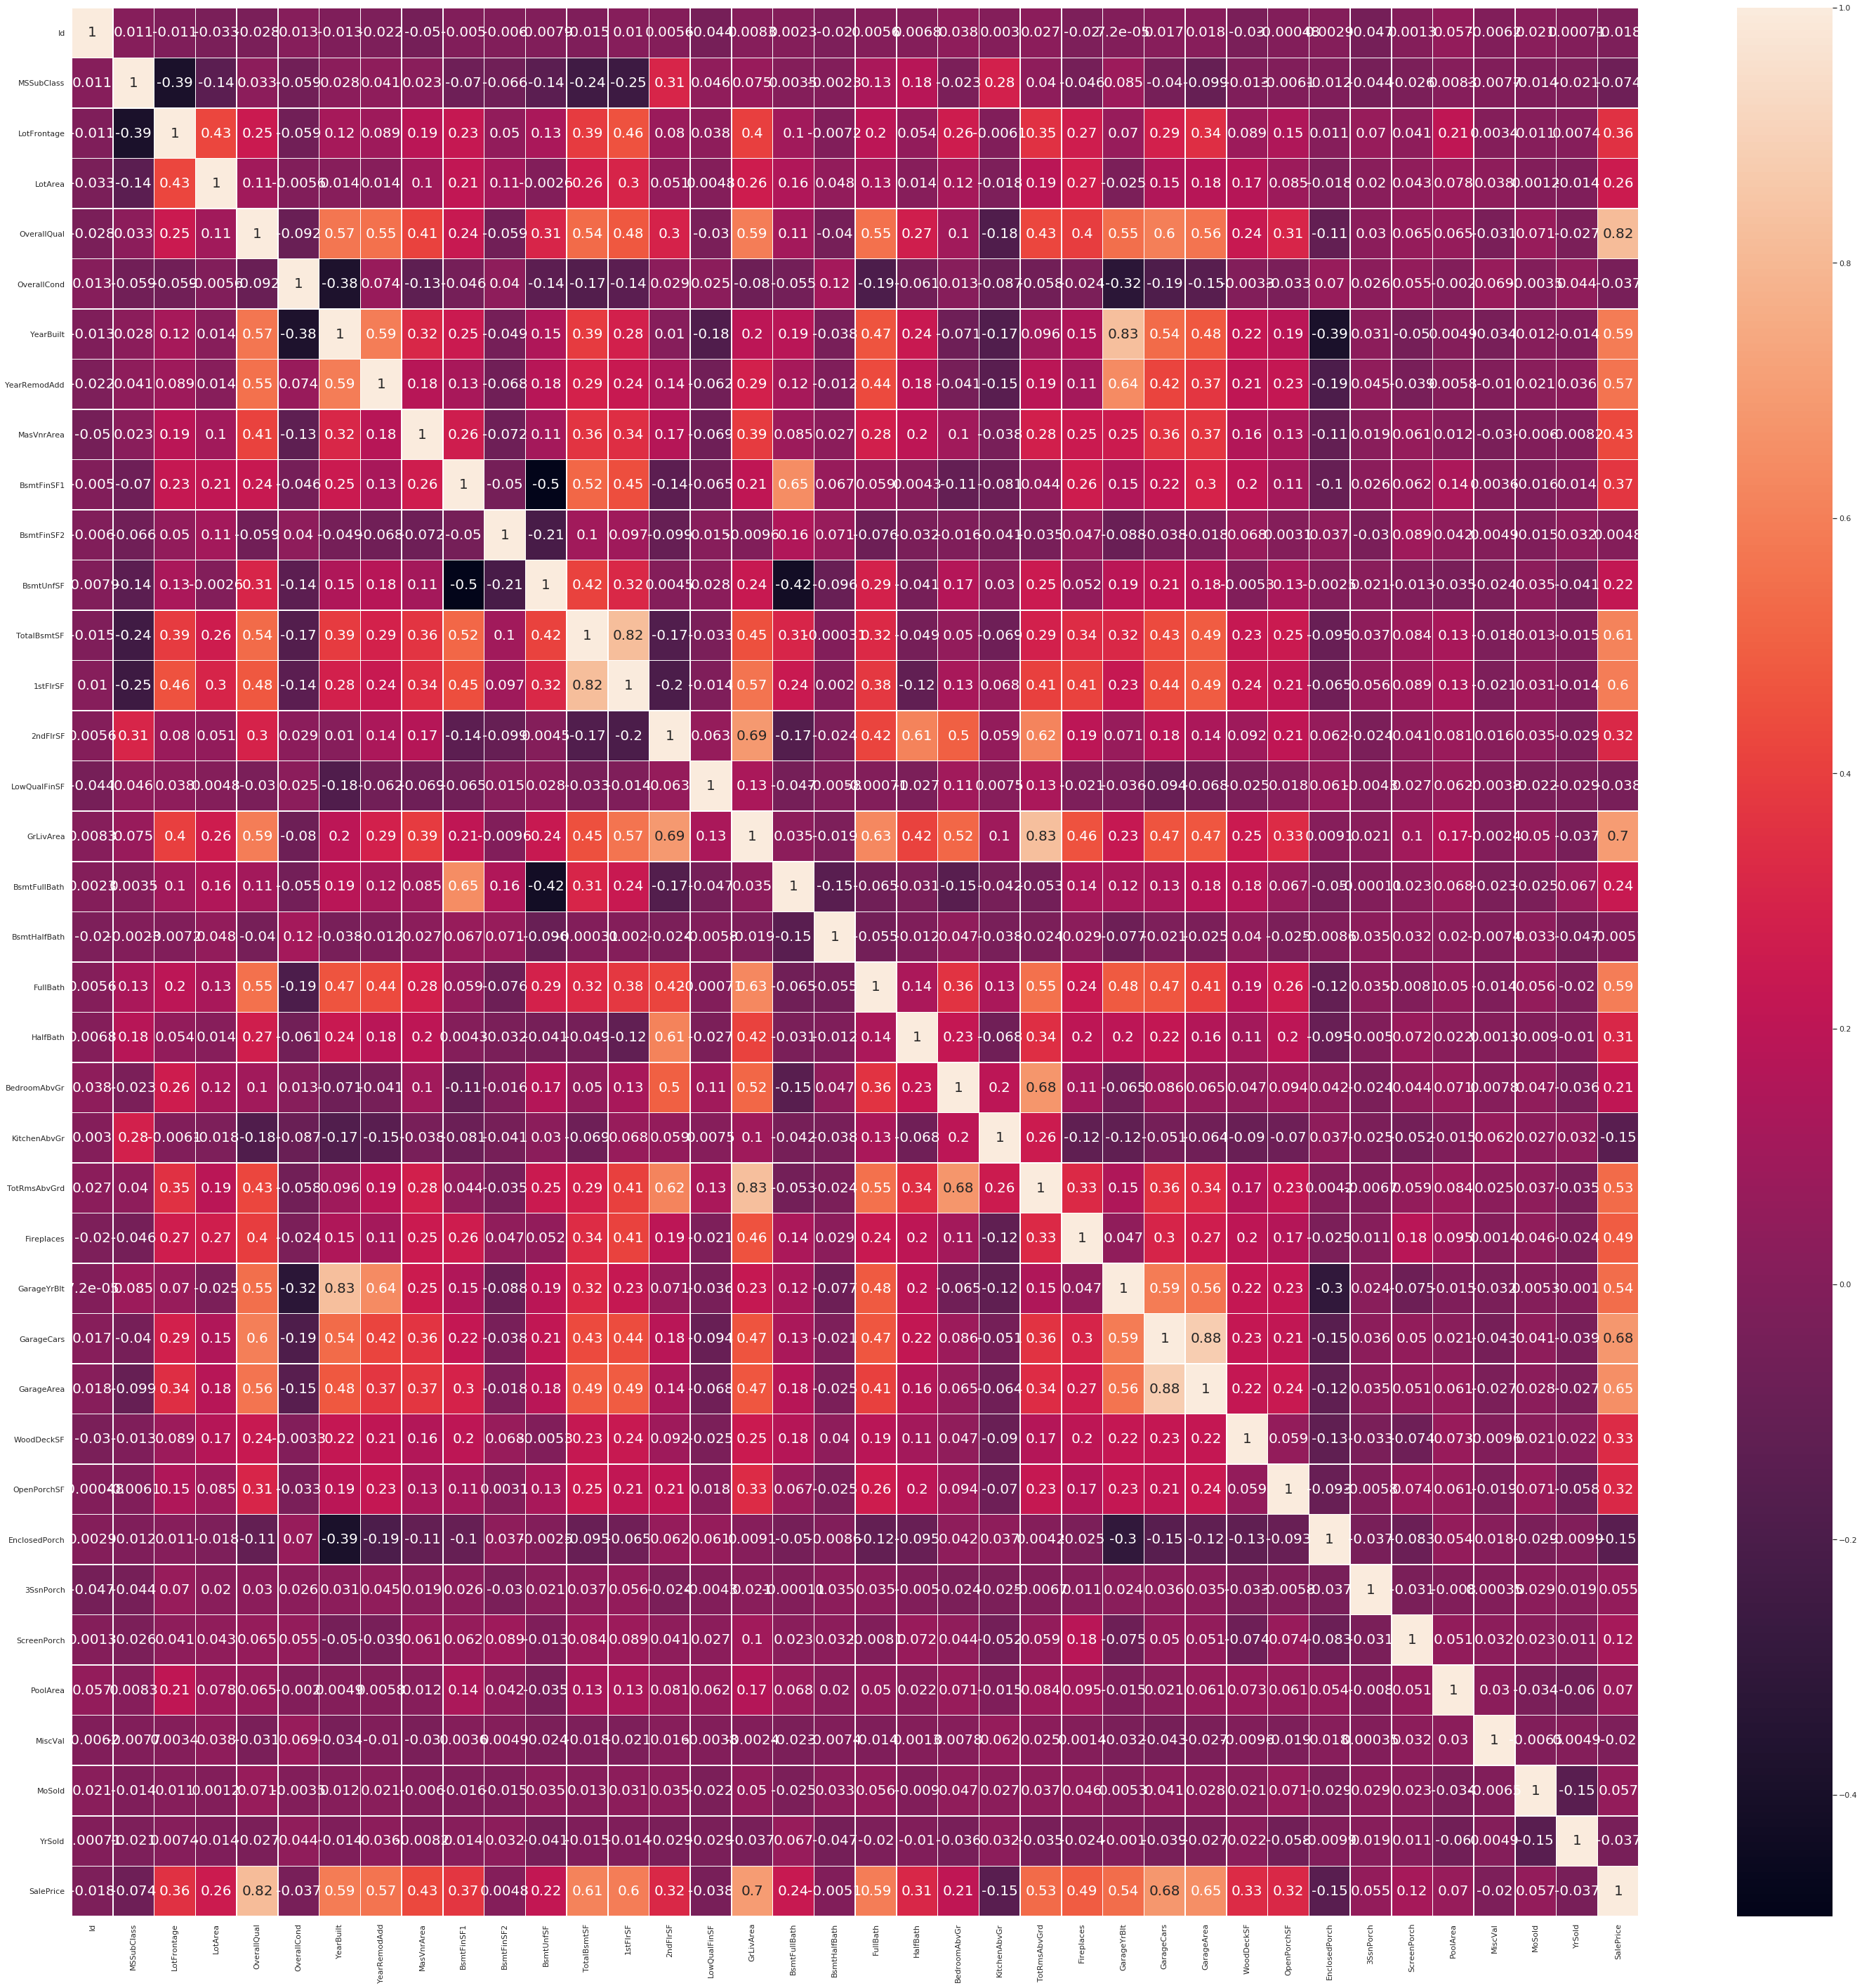

In [41]:
plt.rcParams['font.size'] = 50 # use http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
fig, ax = plt.subplots(figsize = (50, 50))
sns.heatmap(logTrain.corr(), annot=True, annot_kws={"size": 20}, linewidths=.5, ax=ax) # Use from https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
plt.rcParams['font.size'] = 15

In [42]:
train.corr().SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [43]:
logTrain.corr().SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

بله. همان‌طور که می‌بینید، مقدار کورلیشن‌ها و بعضا ترتیب فیچرها تغییر کرده است. دلیل این نیز واضح است. زیرا کورلیشنی که ما حساب می‌کنیم، شهودی از خطی بودن دو ویژگی به ما می‌دهد. اما همان‌طور که در تصاویر بعدی مشاهده می‌کنید، ممکن است ویژگی‌ها با هم رابطه‌ای غیر خطی داشته باشند. مثلا به توان برسند. اگر به توان برسند و ما از log استفاده کنیم، کورلیشن این ویژگی‌ها زیاد می‌شود. 

## 5

خیر؛ زیرا ما از داده‌های عددی تنها استفاده کردیم. پس باید برای داده‌های غیر عددی‌مان کاری انجام دهیم. ایراد بعدی‌ای که می‌توان گفت، می‌تواند این باشد که ما ویژگی‌هایی که ممکن است رابطه‌ی قابل قبولی با ویژگی هدف داشته باشند را به دلیل خطی نبودن کنار گذاشتیم. مثلا فرض کنید قیمت خانه با متراژ خانه رابطه‌ی توان دویی دارد؛ یعنی اگر مساحت $x$ باشد، قیمت خانه $x^2$ خواهد بود. در صورتی که کورلیشن به ما عدد کمی نشان خواهد داد. 

## 6

In [44]:
def numericalFeaturePlots(featureName, targetName, data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(27, 10))
    fig.suptitle('Plots of feature ' + featureName)
    ax1.hexbin(data[featureName], data[targetName])
    ax2.scatter(data[featureName], data[targetName])

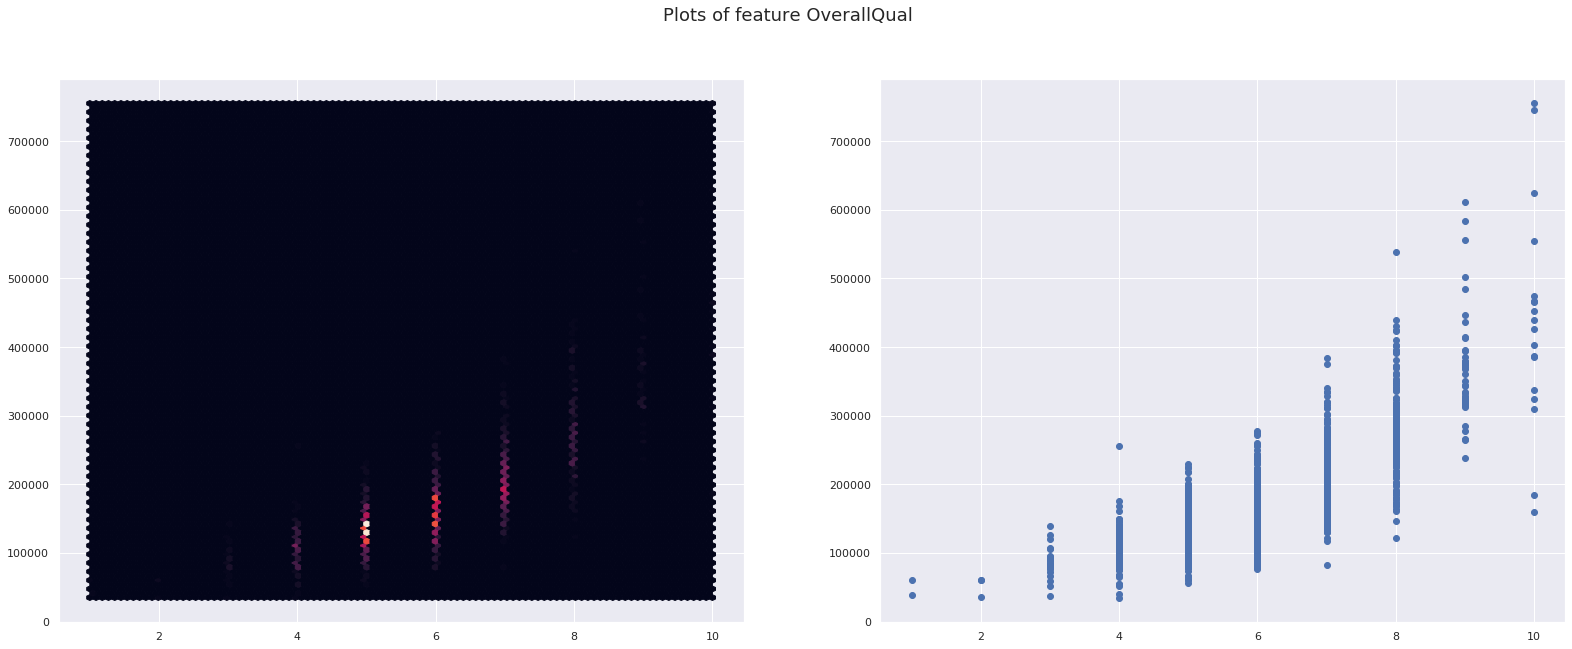

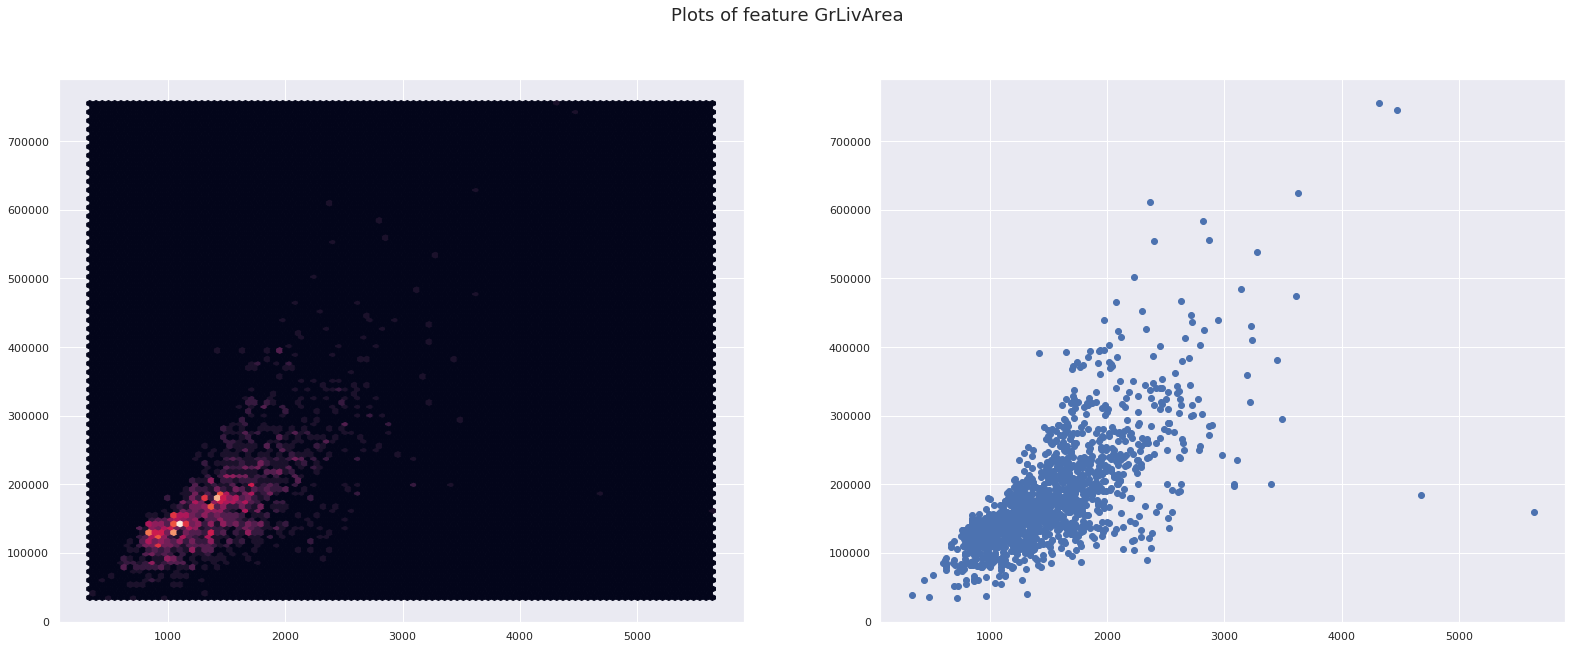

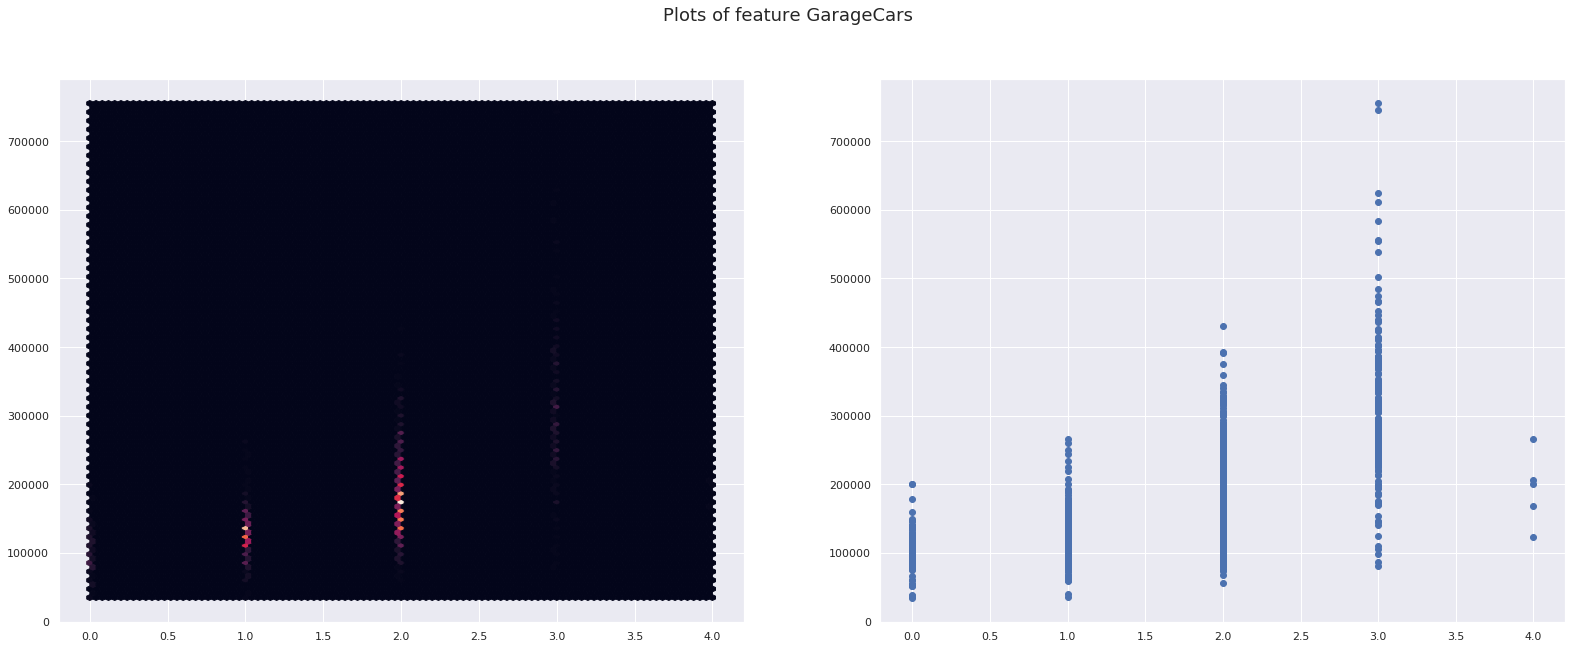

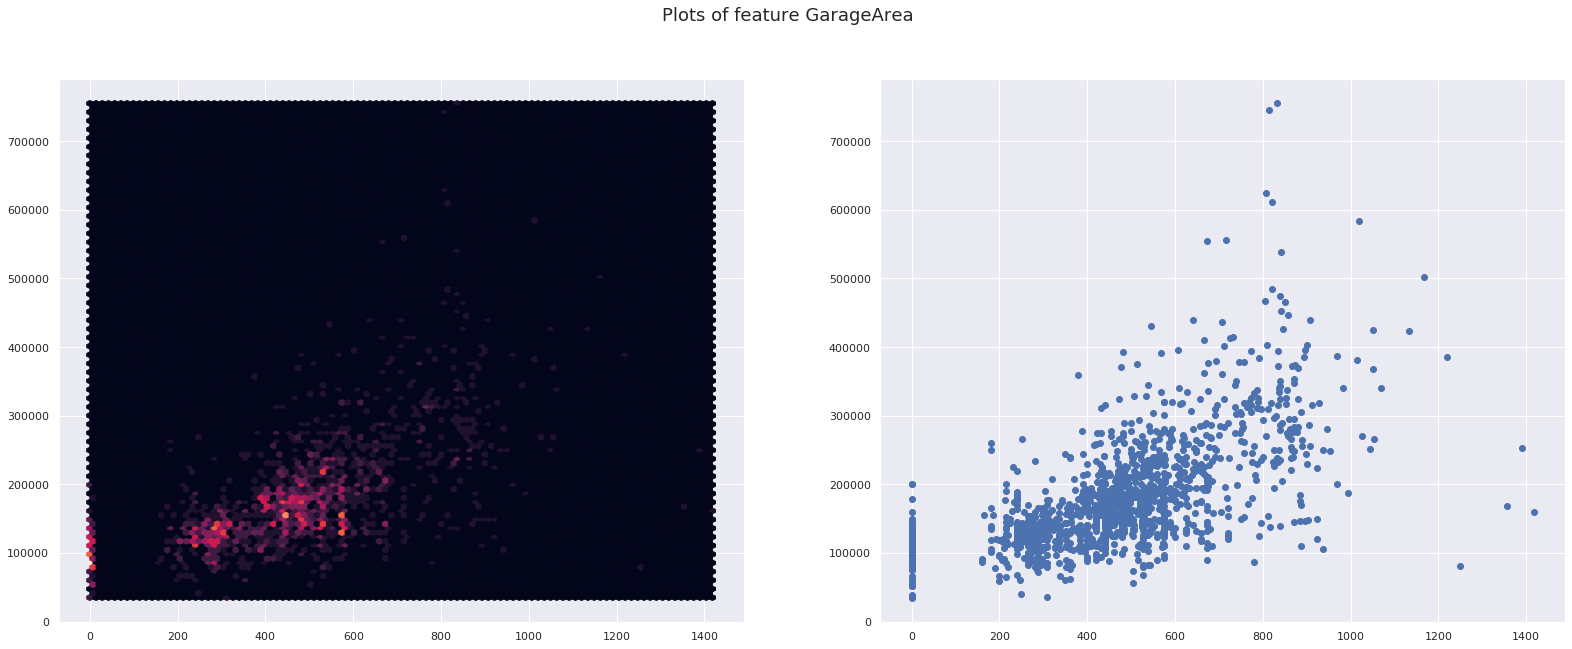

In [45]:
target = "SalePrice"
for name in top4Names:
    numericalFeaturePlots(name, target, train)

همان‌طور که می‌بینید ویژگی OverallQual رابطه‌ی غیرخطی خود را با قیمت خانه نشان می‌دهد. به همین خاطر بود که با $log$ گرفتن از قیمت خانه، به کورلیشن بالاتری دست پیدا کرده بودیم. برای متراژ طبقه‌های بالایی و گاراژ نیز کمی این خطی زیاد شدن قیمت مشخص است. چیزی که جالب است، وجود بعضی داده‌های پرت در این دو نمودار است. مثلا خانه‌ای وجود دارد که با متراژ بسیار بالا، قیمت کمی دارد. در مورد تعداد ماشین‌هایی که در گاراژ جا می‌شوند نیز می‌توان کمی غیرخطی بودن این دو ویژگی نسبت به هم را دید. اما نکته‌ی مهم پراکندگی قیمت به ازای هر تعداد ماشین می‌باشد که کار را سخت می‌کند و نکته‌ی مهم‌تر نیز وجود درصد بالایی از خانه‌های ۲ ماشینه، نسبت به کل داده‌هاست که می‌تواند در یادگیری مشکل‌ساز شود. 

## 7

ما با توجه به این که در ایران زندگی می‌کنیم، احتمالا با توجه به تفاوت‌های فرهنگی‌ای که داریم نتوانیم خیلی دقیق و خوب این ویژگی‌ها را انتخاب کنیم؛ اما از نظر من، در بین ویژگی‌های دسته‌ای، فکر می‌کنم سه ویژگی MSZoning ،Neighborhood و SaleCondition ویژگی‌های دسته‌ای تاثیرگذارمان باشند. 

In [46]:
def categoricalFeaturePlots(featureName, targetName, data):
    plt.rcParams['font.size'] = 19
    fig, ax = plt.subplots(1, 1, figsize=(27, 10))
    fig.suptitle('Plots of feature ' + featureName)
    ax.scatter(data[featureName], data[targetName])

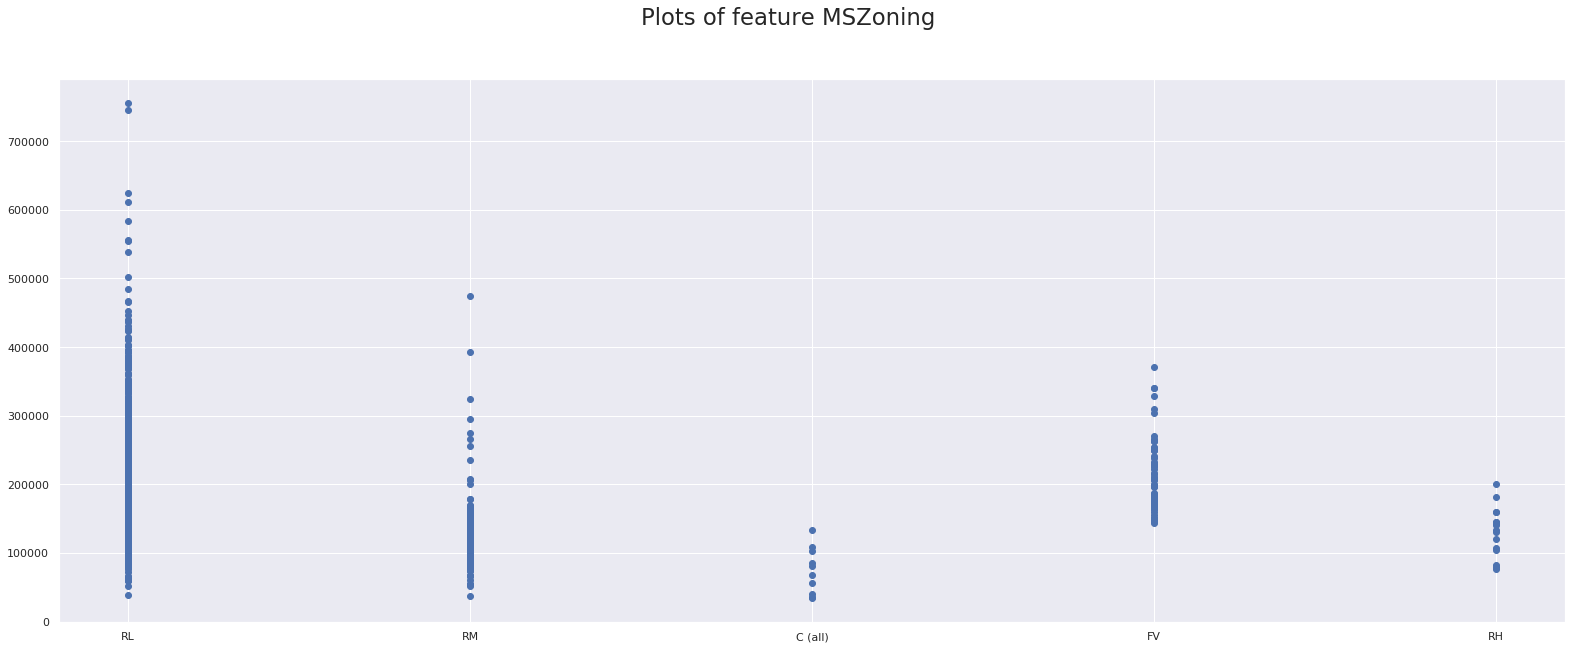

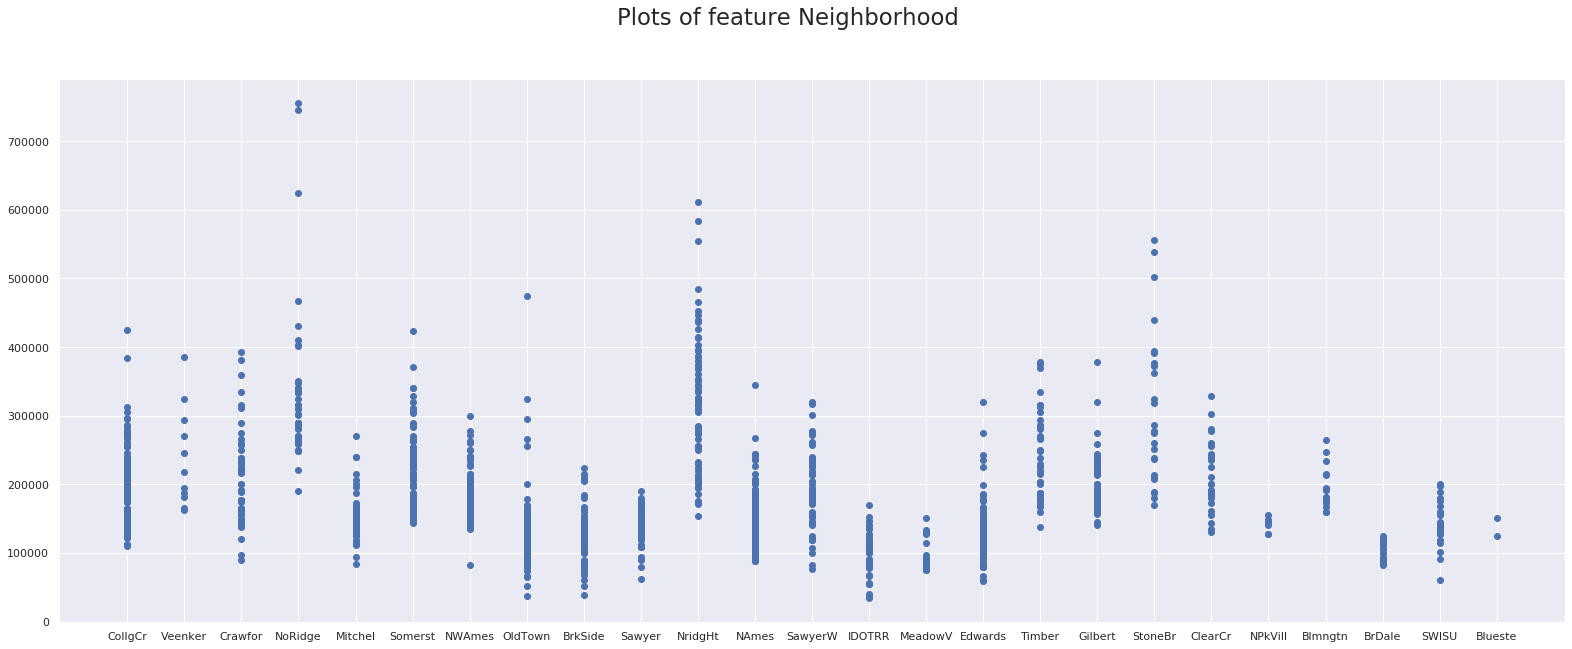

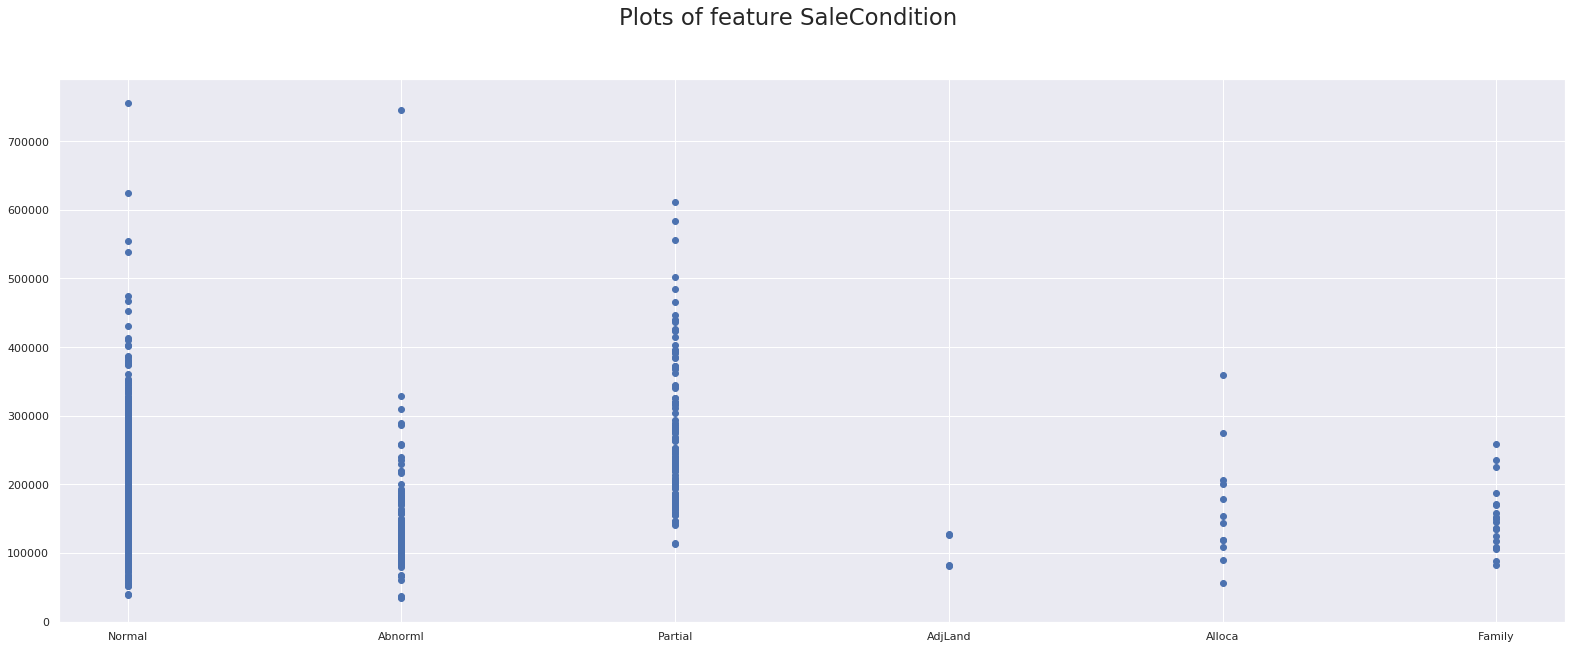

In [47]:
categoricalFeatures = ["MSZoning", "Neighborhood", "SaleCondition"]
for feature in categoricalFeatures:
    categoricalFeaturePlots(feature, target, train)

## 8

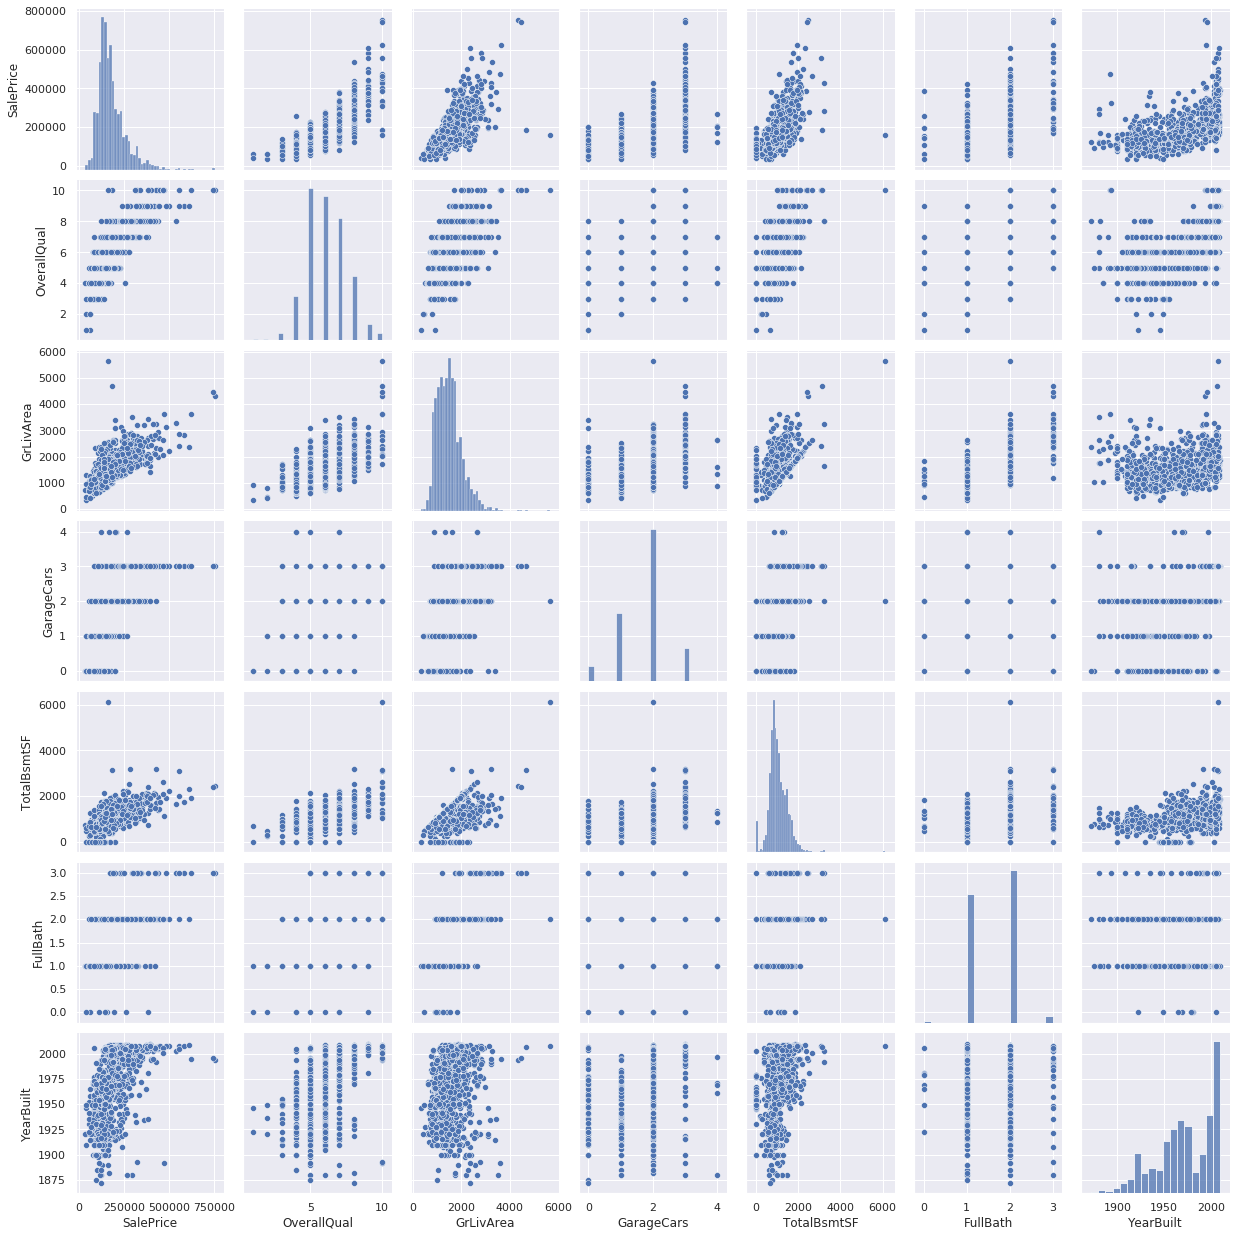

In [48]:
sns.set() # Use from https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

# Phase 1

## 1

روش دیگر می‌تواند حذف سطر مورد نظر باشد. چندین روش دیگر نیز در پروژه‌های قبلی گفته شد. مثل این که داده‌ی سطر قبلی یا بعدی را به سطر بعدی که ستونش داده‌ای ندارد، منتقل کنیم. به نظرم بسته به شرایط می‌توانیم کار‌های مختلفی کنیم. مثلا فرض کنید برای خانه‌های تهران داده جمع کرده‌ایم و در ویژگی‌ استخر داشتن یا نداشتن آن، برای خانه‌هایی که استخر داشته‌اند YES داریم و در غیر این صورت داده‌ها را یادمان رفته وارد کنیم و NaN هستند. در این صورت اگر ما از مقداری استفاده کنیم که بیش‌ترین تکرار را دارد،ِ آن‌گاه همه‌ی داده‌هایمان YES می‌شوند. در صورتی که می‌دانیم که خانه‌های تهران عموما استخر ندارند. (حداقل ما که ندیدیم :)) اما مثلا به عنوان مثال برای متراژ خانه اگر از میانگین استفاده کنیم، به نظرم می‌تواند معقول باشد. ممکن است از ویژگی‌ای شناختی نداشته باشیم و تعداد NaNهای این ویژگی زیاد باشد. در این صورت بسته به شرایط، ممکن 
است بهترین راه این باشد که این ستون حذف شود.

حذف کردن سطر در زمانی که تعداد داده‌هایمان زیاد است می‌تواند به خوبی عمل کند. جایگزین کردن با آماره‌ها، باید با آگاهی از ویژگی صورت بگیرد. حذف ویژگی نیز می‌تواند خوب باشید اگر تعداد ویژگی‌های مفیدمان زیاد باشد و داده‌های کمی از این ویژگی داشته باشیم.

## 2

In [49]:
nan = pd.Series(dtype='float64');
for col in columns:
    nan[col] = nanPercent(train, col)
nan = nan.sort_values()
for feature in nan.index:
    if nan[feature] != 0:
        print(feature, '\t', nan[feature])

Electrical 	 0.0684931506849315
MasVnrType 	 0.547945205479452
MasVnrArea 	 0.547945205479452
BsmtQual 	 2.5342465753424657
BsmtCond 	 2.5342465753424657
BsmtFinType1 	 2.5342465753424657
BsmtFinType2 	 2.6027397260273974
BsmtExposure 	 2.6027397260273974
GarageQual 	 5.5479452054794525
GarageFinish 	 5.5479452054794525
GarageYrBlt 	 5.5479452054794525
GarageType 	 5.5479452054794525
GarageCond 	 5.5479452054794525
LotFrontage 	 17.73972602739726
FireplaceQu 	 47.26027397260274
Fence 	 80.75342465753424
Alley 	 93.76712328767123
MiscFeature 	 96.30136986301369
PoolQC 	 99.52054794520548


ویژگی‌ها با توجه به میزان داده‌های گم‌شده مرتب کرده‌ایم. لزوما نباید ویژگی‌هایی که درصد بالایی کاستی دارند را حذف کنیم. هر ویژگی را به صورت 
جدا مورد بررسی قرار می‌دهیم.

### PoolQC, MiscFeature, Fence,  FireplaceQu, GarageCond, GarageType, GarageFinish, GarageQual, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtCond, BsmtQual, MasVnrType

In [50]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [51]:
featuresWithoutNA = ["PoolQC", "MiscFeature", "Fence",  "FireplaceQu", "GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual", "MasVnrType"]
hasNA = False
for feature in featuresWithoutNA:
    if len(train.loc[train[feature] == "NA"]) > 0:
        hasNA = True
        break
if hasNA:
    print("Some features of selected features has at least one row with NA.")
else:
    print("None of selected features has a row with NA.")

None of selected features has a row with NA.


از آن‌جایی که در دیتای این ویژگی تنها کیفیت‌ها را داریم. پس احتمال این که بقیه‌ی داده‌هایی که این ویژگی برای آن‌ها مقدار ندارد، مثلا استخر نداشته باشند بسیار زیاد است. در ضمن خانه‌های استخر دار کم هستند. پس راه منطقی برای این خانه‌ها این است که مقادیر آن‌ها را با NA پر کنیم.

In [52]:
for feature in featuresWithoutNA:
    train.loc[train[feature].isna(), feature] = "NA"
    #print(feature, nanPercent(train, feature))

In [53]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Alley

In [54]:
train = train.drop(labels=['Alley'], axis=1)

به دلیل کم اهمیت بودن این ویژگی از نظر ما، درصد بالای نبود اطلاعات و عدم پیش‌بینی پذیری آن برای داده‌هایی که این اطلاعات را ندارند، این ویژگی از داده‌ی ما حذف می‌شود.

### LotFrontage, GarageYrBlt, MasVnrArea

In [55]:
meanFeature = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]
for feature in meanFeature:
    train[feature].fillna(train[feature].mean(), inplace = True)

سه ویژگی بالا عددی بوده و می‌توانند میانگین بقیه دیتا را بگیرند. از میانگین برای آن‌ها استفاده می‌کنیم.

### Electrical

In [56]:
train = train[train.Electrical.isna() == False]

از آن جایی که نمی‌توانیم تصمیم قطعی‌ای برای این ویژگی بگیریم و تاثیر آن در قیمت طبق فاز ۰ کم است، می‌توانیم این ویژگی را حذف کنیم.

In [57]:
nan = pd.Series(dtype='float64');
columns = train.columns
for col in columns:
    nan[col] = nanPercent(train, col)
nan = nan.sort_values()
for feature in nan.index:
    if nan[feature] != 0:
        print(feature, '\t', nan[feature])

## 3

برای این که تاثیر واحد هر ویژگی در پیش‌بینی ما تاثیری نگذارد، ما از روش‌های گفته شده استفاده می‌کنیم. مثلا زمانی که مبلغ خانه به ریال باشد و متراژ خانه به کیلومتر مربع باشد، باید ضریب مربوط به متراژ بسیار زیاد باشد و طبق الگوریتم‌هایی که ما داریم و مانند گرادیان دیسنت قدم‌های بزرگی می‌طلبد. پس بهتر است داده‌ها را نرمالایز کنیم.

In [58]:
from sklearn.preprocessing import StandardScaler
numCols = train.columns[train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
numCols = numCols[1:-1] #Remove id and SalePrice
print(numCols)

scaler = StandardScaler()
train[numCols] = scaler.fit_transform(train[numCols])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [59]:
train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0   1    0.073732       RL    -0.229203 -0.207125   Pave      Reg         Lvl   
1   2   -0.871979       RL     0.451876 -0.091909   Pave      Reg         Lvl   
2   3    0.073732       RL    -0.092987  0.073401   Pave      IR1         Lvl   
3   4    0.310159       RL    -0.456229 -0.096918   Pave      IR1         Lvl   
4   5    0.073732       RL     0.633497  0.374967   Pave      IR1         Lvl   

  Utilities LotConfig  ...  PoolArea PoolQC Fence MiscFeature   MiscVal  \
0    AllPub    Inside  ... -0.068715     NA    NA          NA -0.087718   
1    AllPub       FR2  ... -0.068715     NA    NA          NA -0.087718   
2    AllPub    Inside  ... -0.068715     NA    NA          NA -0.087718   
3    AllPub    Corner  ... -0.068715     NA    NA          NA -0.087718   
4    AllPub       FR2  ... -0.068715     NA    NA          NA -0.087718   

     MoSold    YrSold  SaleType  SaleCondition  SalePrice  
0 -1.599030  0.138826        WD         Normal     208500  
1 -0.489318 -0.614137        WD         Normal     181500  
2  0.990298  0.138826        WD         Normal     223500  
3 -1.599030 -1.367100        WD        Abnorml     140000  
4  2.100010  0.138826        WD         Normal     250000  

[5 rows x 80 columns]

## 4

In [60]:
type(train.SalePrice[0])

numpy.int64

In [61]:
train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0   1    0.073732       RL    -0.229203 -0.207125   Pave      Reg         Lvl   
1   2   -0.871979       RL     0.451876 -0.091909   Pave      Reg         Lvl   
2   3    0.073732       RL    -0.092987  0.073401   Pave      IR1         Lvl   
3   4    0.310159       RL    -0.456229 -0.096918   Pave      IR1         Lvl   
4   5    0.073732       RL     0.633497  0.374967   Pave      IR1         Lvl   

  Utilities LotConfig  ...  PoolArea PoolQC Fence MiscFeature   MiscVal  \
0    AllPub    Inside  ... -0.068715     NA    NA          NA -0.087718   
1    AllPub       FR2  ... -0.068715     NA    NA          NA -0.087718   
2    AllPub    Inside  ... -0.068715     NA    NA          NA -0.087718   
3    AllPub    Corner  ... -0.068715     NA    NA          NA -0.087718   
4    AllPub       FR2  ... -0.068715     NA    NA          NA -0.087718   

     MoSold    YrSold  SaleType  SaleCondition  SalePrice  
0 -1.599030  0.138826        WD         Normal     208500  
1 -0.489318 -0.614137        WD         Normal     181500  
2  0.990298  0.138826        WD         Normal     223500  
3 -1.599030 -1.367100        WD        Abnorml     140000  
4  2.100010  0.138826        WD         Normal     250000  

[5 rows x 80 columns]

یک روش one-hot موجود است که به ازای هر مقدار یک ستون می‌گذارد و اگر برای هر داده، این مقدار درست باشد، در ستون ۱ و در غیر این صورت ۰ می‌نویسد. روش دیگری که موجود است، دادن مقادیر ۱ ۲ ۳ ۴ ۵ الی آخر به کلاس‌ها است. در بعضی از ویژگی‌ها که ترتیب آن‌ها مانند ۱ ۲ ۳ ۴ و ... است، این کار مفید است؛ اما در شرایطی که کلاس‌ها به هم ربطی نداشته باشند، این که مثلا کلاس پیکان را ۱ بگذاریم، بی‌ام‌وه را ۲ و بنز را ۳ بگذاریم، یک فرض غلط به الگوریتم‌های آموزش ما می‌دهد که فاصله‌ی پیکان تا بی‌ام‌وه و بنز تا بی‌ام‌وه یکی است. (که هست :)) در دیتای ما نیز مواردی وجود دارد که می‌توان آن‌ها را ترتیبی نوشت.

## 5

ابتدا برای راحتی بیش‌تر ویژگی‌هایی که حس می‌کنیم کم‌تر به درد می‌خورند را طبق هیت مپی که کشیده شد، حذف می‌کنیم که مراحل تبدیل داده‌های categorical راحت‌تر باشد. واضح است که نباید همه ستون‌ها را نگه داریم. نگه داشتن تعداد زیادی ویژگی باعث می‌شود، الگوریتم‌هایی مانند KNN بد کار کنند زیرا فاصله‌ی داده‌ها از هم زیاد می‌شوند.

In [63]:
train = train.drop(labels=['LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF',\
                          'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF',\
                          'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold',\
                          '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',\
                          'OverallCond', 'YrSold', 'LowQualFinSF', 'MSSubClass',\
                          'KitchenAbvGr', 'EnclosedPorch', 'LotShape', 'LandContour',\
                          'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle',\
                          'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\
                          'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',\
                          'GarageFinish', 'PavedDrive', 'MiscFeature', 'Fence', 'PoolQC',\
                          'GarageCond', 'HouseStyle', 'BsmtCond', 'BldgType', 'RoofMatl',\
                          'Heating'], axis=1)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   Street         1459 non-null   object 
 3   Utilities      1459 non-null   object 
 4   Neighborhood   1459 non-null   object 
 5   OverallQual    1459 non-null   float64
 6   YearBuilt      1459 non-null   float64
 7   YearRemodAdd   1459 non-null   float64
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   object 
 10  ExterCond      1459 non-null   object 
 11  BsmtQual       1459 non-null   object 
 12  BsmtExposure   1459 non-null   object 
 13  BsmtFinSF1     1459 non-null   float64
 14  TotalBsmtSF    1459 non-null   float64
 15  HeatingQC      1459 non-null   object 
 16  CentralAir     1459 non-null   object 
 17  1stFlrSF       1459 non-null   float64
 18  GrLivAre

In [65]:
# Ordinal Feature Encoding
from sklearn.preprocessing import LabelEncoder
ordinalFeatures = ['Utilities', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'HeatingQC',\
                  'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageQual']
for feature in ordinalFeatures:
    labelEncoder = LabelEncoder()
    train[feature] = labelEncoder.fit_transform(train[feature])
    
# Nominal Feature
nominalFeature = ['MSZoning', 'Street', 'Neighborhood', 'Functional', 'SaleType', 'SaleCondition']
for feature in nominalFeature:
    oneHot = pd.get_dummies(train[feature], drop_first=True)
    train = train.drop(feature, axis = 1)
    train = train.join(oneHot)

## 6

در کورس‌های مختلف دیده‌ام که درصد جداسازی P اگر حدود ۲۰ درصد باشد بسیار عالی است و این را به تجربه می‌گفتند. البته بستگی به تعداد دیتاهای موجود نیز دارد.

بله روش‌های دیگری نیز وجود دارد. مثلا می‌توان یک تکه‌ی کوچکی از داده‌ها را آموزش داد بعد باقی داده‌ها را آزمایش کرد، سپس از داده‌های آزمون دوباره مقداری را آموزش داد و دوباره این فرآیند را تکرار کرد.

بله. خیلی مهم است که داده‌ها به صورت تصادفی تقسیم شوند. زیرا ممکن است که داده‌ها با یک منطقی نوشته شده باشند. مثلا زمان فروششان. پس یک ترتیبی داشته باشند و این برای آموزش ما بد است. البته در شرایطی هم وجود دارد (مثل مسابقه‌ی دیتادیز پارسال شریف) که ما مجبوریم دسته‌ای از داده‌ها را با هم پیش‌بینی کنیم. در این صورت باید دسته‌ها را مشخص کرده و بین آن‌ها رندوم انتخاب کنیم.

In [66]:
from sklearn.model_selection import train_test_split
trainSp, testSp = train_test_split(train, test_size=0.20, random_state=42)
trainSp.head()

Id  Utilities  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
254    255          0    -0.795596  -0.471824     -1.349529   -0.574672   
1065  1066          0     0.650852   0.820028      0.588713   -0.574672   
864    865          0     0.650852   1.184397      1.121729   -0.574672   
798    799          0     2.097301   1.217521      1.170185    4.188586   
380    381          0    -0.795596  -1.564930     -1.688721   -0.574672   

      ExterQual  ExterCond  BsmtQual  BsmtExposure  ...  ConLI  ConLw  New  \
254           3          2         4             4  ...      0      0    0   
1065          2          4         0             1  ...      0      0    0   
864           2          4         0             4  ...      0      0    1   
798           0          4         0             4  ...      0      0    1   
380           3          4         4             4  ...      0      0    0   

      Oth  WD  AdjLand  Alloca  Family  Normal  Partial  
254     0   1        0       0       0       1        0  
1065    0   1        0       0       0       1        0  
864     0   0        0       0       0       0        1  
798     0   0        0       0       0       0        1  
380     0   1        0       0       0       1        0  

[5 rows x 74 columns]

In [67]:
testSp.head()

Id  Utilities  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
1321  1322          0    -2.242045  -0.736820     -1.688721   -0.574672   
836    837          0    -0.795596  -0.769944     -0.574232   -0.574672   
413    414          0    -0.795596  -1.465557     -1.688721   -0.574672   
522    523          0    -0.072372  -0.803069     -1.688721   -0.574672   
1035  1036          0    -1.518821  -0.471824     -1.349529   -0.574672   

      ExterQual  ExterCond  BsmtQual  BsmtExposure  ...  ConLI  ConLw  New  \
1321          3          4         3             3  ...      0      0    0   
836           3          4         4             4  ...      0      0    0   
413           3          4         4             4  ...      0      0    0   
522           3          2         4             4  ...      0      0    0   
1035          3          2         3             3  ...      0      0    0   

      Oth  WD  AdjLand  Alloca  Family  Normal  Partial  
1321    0   1        0       0       0       1        0  
836     0   0        0       0       0       1        0  
413     0   1        0       0       0       1        0  
522     0   1        0       0       0       1        0  
1035    0   1        0       0       0       1        0  

[5 rows x 74 columns]

In [68]:
print(len(trainSp), len(testSp))

1167 292


# Phase 2

## KNN

Min MAE is 39484.7796803653 with 3 n_neighbors
Min RMSE is 55100.0724917446 with 3 n_neighbors


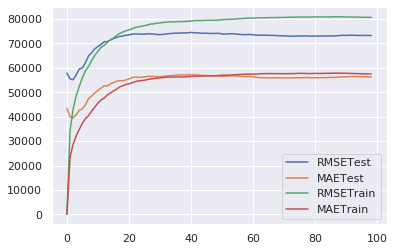

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
minErrorMSE = 100000000000
minErrorMAE = 100000000000
idMinMSE = 1
idMinMAE = 1
MSElist = []
MAElist = []
MSElistTrain = []
MAElistTrain = []
X = trainSp.drop('SalePrice', axis=1)
y = trainSp.SalePrice
Xtest = testSp.drop('SalePrice', axis=1)
for neighbors in range(1, 100):
    neigh = KNeighborsRegressor(n_neighbors=neighbors)
    neigh.fit(X, y)
    predict = neigh.predict(Xtest)
    predictTrain = neigh.predict(X)
    MSE = mean_squared_error(testSp.SalePrice, predict)
    MAE = mean_absolute_error(testSp.SalePrice, predict)
    MSElist.append(MSE**0.5)
    MAElist.append(MAE)
    MSElistTrain.append(mean_squared_error(y, predictTrain)**0.5)
    MAElistTrain.append(mean_absolute_error(y, predictTrain))
    if MSE < minErrorMSE:
        minErrorMSE = MSE
        idMinMSE = neighbors
    if MAE < minErrorMAE:
        minErrorMAE = MAE
        idMinMAE = neighbors
print("Min MAE is", minErrorMAE, "with", idMinMAE, "n_neighbors")
print("Min RMSE is", minErrorMSE ** 0.5, "with", idMinMSE, "n_neighbors")
p1, = plt.plot(MSElist, label="RMSETest")
p2, = plt.plot(MAElist, label="MAETest")
p3, = plt.plot(MSElistTrain, label="RMSETrain")
p4, = plt.plot(MAElistTrain, label="MAETrain")
plt.legend(handles=[p1, p2, p3, p4])

## Decision Tree

Min MAE is 23191.15201214311 with 14 max_depth
Min RMSE is 32847.90312190818 with 7 max_depth


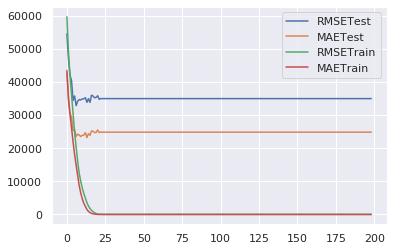

In [70]:
from sklearn.tree import DecisionTreeRegressor
minErrorMSE = 100000000000
minErrorMAE = 100000000000
idMinMSE = 1
idMinMAE = 1
MSElist = []
MAElist = []
MSElistTrain = []
MAElistTrain = []
X = trainSp.drop('SalePrice', axis=1)
y = trainSp.SalePrice
Xtest = testSp.drop('SalePrice', axis=1)
for maxDepth in range(1, 200):
    clf = DecisionTreeRegressor(random_state=23, max_depth=maxDepth)
    clf.fit(X, y)
    predict = clf.predict(Xtest)
    predictTrain = clf.predict(X)
    MSE = mean_squared_error(testSp.SalePrice, predict)
    MAE = mean_absolute_error(testSp.SalePrice, predict)
    MSElist.append(MSE**0.5)
    MAElist.append(MAE)
    MSElistTrain.append(mean_squared_error(y, predictTrain)**0.5)
    MAElistTrain.append(mean_absolute_error(y, predictTrain))
    if MSE < minErrorMSE:
        minErrorMSE = MSE
        idMinMSE = maxDepth
    if MAE < minErrorMAE:
        minErrorMAE = MAE
        idMinMAE = maxDepth
print("Min MAE is", minErrorMAE, "with", idMinMAE, "max_depth")
print("Min RMSE is", minErrorMSE ** 0.5, "with", idMinMSE, "max_depth")
p1, = plt.plot(MSElist, label="RMSETest")
p2, = plt.plot(MAElist, label="MAETest")
p3, = plt.plot(MSElistTrain, label="RMSETrain")
p4, = plt.plot(MAElistTrain, label="MAETrain")
plt.legend(handles=[p1, p2, p3, p4])

## LinearRegression

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = trainSp.drop('SalePrice', axis=1)
y = trainSp.SalePrice
lr.fit(X, y)
MSE = mean_squared_error(testSp.SalePrice, lr.predict(testSp.drop('SalePrice', axis=1)))
MAE = mean_absolute_error(testSp.SalePrice, lr.predict(testSp.drop('SalePrice', axis=1)))
print("MAE is", MAE)
print("RMSE is", MSE ** 0.5)

MAE is 18419.597925250404
RMSE is 24617.577917692688


## 3

overfitting زمانی رخ می‌دهد که مدل ما بسیار پیچیده شده باشد و روی داده‌های آزمایشی به خوبی عمل کند اما در داده‌های جدید آزمایشی، درست کار نکند. (به دلیل پیچیدگی زیاد.) underfitting نیز زمانی است که مدل ما بسیار ساده باشد و در این صورت نه روی داده‌های آزمایشی خیلی خوب کار می‌کند و نه روی داده‌های آزمون. مثلا در مثال‌های بالا اگر نمودارهای کشیده شده را مشاهده کنید، می‌بینید که از یک جایی به قبل یا بعد، ارورهای آزمایشی نزدیک به صفر شده‌اند. این یعنی ممکن است گرفتار overfitting شده باشیم. حالتی خوب است که ارورهای آزمایشی باشد و ارور آزمون در کم‌ترین حالت خود باشد. که مقادیر به دست آمده در روش‌ها از این خاصیت پیروی می‌کنند. پس احتمالا نه overfitting داریم و نه underfitting.

## 4

ویژگی‌های مختلفی اضافه و کم شد و تغییرات هر کدام بررسی شد. در انتها به این سری ویژگی‌ها رسیدیم که بازخورد خوبی به ما در داده‌هایمان داد. با حذف ویژگی‌های کم اهمیت تغییر زیادی را در نتیجه‌ی الگوریتم می‌دیدیم. با این که این الگوریتم‌ها، مثلا linear regression، می‌توانند ضریب تاثیر هر ویژگی را خودشان انتخاب کنند و نقش یک ویژگی را کم کنند، با این حال، اگر ما از ویژگی‌های اضافی پرهیز کنیم، به شرایطی بهتر می‌رسیم.

# Phase 3

## 1

In [72]:
from sklearn.ensemble import RandomForestRegressor
minErrorMSE = 100000000000
minErrorMAE = 100000000000
X = trainSp.drop('SalePrice', axis=1)
y = trainSp.SalePrice
Xtest = testSp.drop('SalePrice', axis=1)
for maxDepth in range(20, 30):
    for nEstimators in range(100, 115):
        clf = RandomForestRegressor(random_state=23, max_depth=maxDepth, n_estimators=nEstimators)        
        clf.fit(X, y)
        predict = clf.predict(Xtest)
        MSE = mean_squared_error(testSp.SalePrice, predict)
        MAE = mean_absolute_error(testSp.SalePrice, predict)
        MSElist.append(MSE**0.5)
        MAElist.append(MAE)
        if MSE < minErrorMSE:
            minErrorMSE = MSE
        if MAE < minErrorMAE:
            minErrorMAE = MAE
print("Min MAE is", minErrorMAE)
print("Min RMSE is", minErrorMSE ** 0.5)

Min MAE is 17245.441317105015
Min RMSE is 24981.764721501444


## 2

In [73]:
from sklearn.ensemble import VotingRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
clf = DecisionTreeRegressor(random_state=23, max_depth=14)
lre = LinearRegression()
er = VotingRegressor([('ne', neigh), ('cl', clf), ('lr', lre)])
X = trainSp.drop('SalePrice', axis=1)
y = trainSp.SalePrice
er.fit(X, y)
predict = er.predict(testSp.drop('SalePrice', axis=1))
MSE = mean_squared_error(testSp.SalePrice, predict)
MAE = mean_absolute_error(testSp.SalePrice, predict)
print("MAE is", MAE)
print("RMSE is", MSE ** 0.5)

MAE is 19865.8519179012
RMSE is 28072.13323416943


## 3

این روش از دو تا از روش‌های قبلی بهتر و از یکی از آن‌ها بدتر است. دلیل برتری این روش می‌تواند وجود روش linear regression در آن باشد. بالاخره داریم روشی که جواب خوبی می‌داد را با روش‌هایی که جواب‌های خوبی نمی‌دادند ترکیب می‌کنیم. پس انتظار بد بودن جواب منطقی است. اگر ارورها نزدیک به هم بود، شاید می‌توانستیم انتظار داشته باشیم که ترکیب این روش‌ها روشی بهتر به ما خروجی بدهد.

# نتیجه‌گیری کلی
در بین روش‌های استفاده شده، الگوریتم linear regression بهترین نتیجه را داشت و متوجه شدیم که حذف ویژگی‌های اضافی چه قدر می‌تواند باعث بهبود الگوریتم ما بشود.

# منابع استفاده شده
از منابع زیادی در کشیدن نمودارها تا استفاده از هر کدام از توابع استفاده شد؛ اما بعضی از این منابع را در کنار کد‌ها گذاشته‌ام.